# Income Prediction: Exploratory Data Analysis

Reads raw data from a local file.

In [1]:
CSV_FILE_TYPE = 'csv'
PARQUET_FILE_TYPE = 'parquet'
PARQUET_ENGINE = 'pyarrow'
RAW_DATA_FILE_TYPE = PARQUET_FILE_TYPE  # or CSV_FILE_TYPE
ADULT_INCOME_DATASET_PATH = f'../data/adult_income_raw.{RAW_DATA_FILE_TYPE}'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
if RAW_DATA_FILE_TYPE == PARQUET_FILE_TYPE:
    data = pd.read_parquet(
        ADULT_INCOME_DATASET_PATH,
        engine=PARQUET_ENGINE,
    )
elif RAW_DATA_FILE_TYPE == CSV_FILE_TYPE:
    data = pd.read_csv(ADULT_INCOME_DATASET_PATH)
else:
    raise Exception(f"Unexpected {RAW_DATA_FILE_TYPE=}. Use one of ['{PARQUET_FILE_TYPE}', '{CSV_FILE_TYPE}'] instead.")
print(f"data loaded from: {ADULT_INCOME_DATASET_PATH}")

data loaded from: ../data/adult_income_raw.parquet


## Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### Data distributions

In [7]:
# 'income' is the dependent variable.
data['income'].isna().sum()

0

(array([0, 1, 2, 3]),
 [Text(0, 0, '<=50K'),
  Text(1, 0, '<=50K.'),
  Text(2, 0, '>50K'),
  Text(3, 0, '>50K.')])

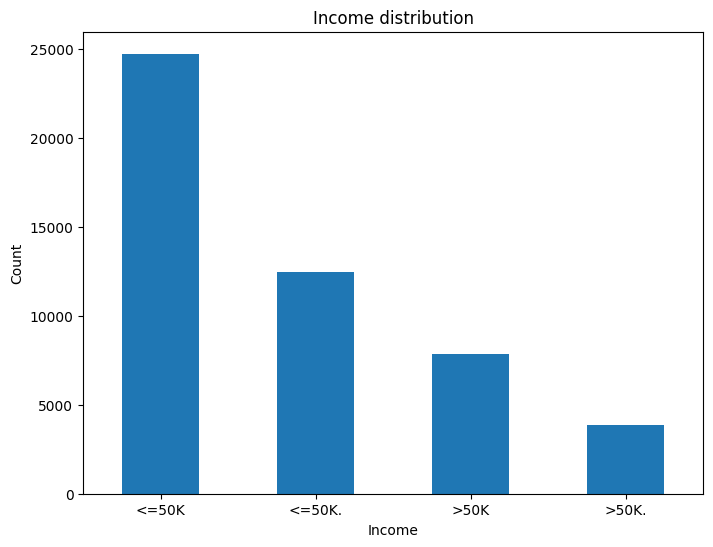

In [8]:
# Plot the income distribution.
# Expect to see two possible values: ['<=50K', '>50K']
plt.figure(figsize=(8,6))
data['income'].value_counts().plot(kind='bar')
plt.title('Income distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
# plt.savefig('income_distribution.png')

In [9]:
data['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [10]:
data['age'].isna().sum()

0

In [11]:
# Note: "?" used for missing values.
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [12]:
# Note: "?" used for missing values.
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [13]:
data['hours-per-week'].value_counts()

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
82        1
87        1
69        1
Name: count, Length: 96, dtype: int64

In [14]:
data['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [15]:
data['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

In [16]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [17]:
# Note: This column is a numeric encoding for the 'education' column.
data['education-num'].value_counts()

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [18]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [19]:
data['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [20]:
data['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [21]:
data['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [22]:
# Note: "?" used for missing values.
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         